# CREATING THE NEURAL NETWORK

In this part of the project we tried to establish different types of machine and deep learning models in order to see if the several algorithms were capable of predict and classify. In this first stage, we created a neural network to see if it was able to predict the types of costumers.

To recap in this case the preferred type of costumer, in this order:

 0: single, couple and family

 1: single and couple

 2: single

 3: couple and family

 4: couple

 5: family and single
 
 6: family
 


In [1]:
import pandas as pd
from functions import *
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', 500)
df= pd.read_csv(r'C:\Users\Héctor\Documents\IRONHACK\DATA ANALIST\BOOTCAMP\CULTURAL VIEWER FINAL PROJECT\final_project\4. CSV\MONUMENT_DATA_FRAME_CLEAN.csv')
df

,Unnamed: 0,name,rating,reviews,description,descriptor,Location,type,cafe,bar,spa,lodging,restaurant,bakery,store,night_club,book_store,tourist_attraction,florist,liquor_store,movie_rental,electronics_store,home_goods_store,movie_theater,gym,health,parking,gas_station,car_wash,convenience_store,car_repair,art_gallery,park,meal_takeaway,meal_delivery,locality,political,general_contractor,police,laundry
0,0,Mezquita Azul,4.7,82703,Famosa Mezquita Azul con 6 alminares,Mezquita,Fatih,0,20,2,1,1,11,3,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Gran Bazar,4.4,117603,Laberinto de vistosos mercados cubiertos,Mercado,Fatih,0,20,2,0,0,9,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Bazar de las Especias,4.5,138987,Mercado de especias y productos textiles,Mercado,Fatih,0,20,2,1,1,10,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,Mezquita de Suleiman,4.9,43378,Histórica mezquita otomana del siglo XVI,Mezquita,Fatih,1,20,1,0,0,8,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Hipódromo de Constantinopla,4.7,26368,Plaza con los restos de un hipódromo,Parque,Fatih,3,20,2,1,1,11,3,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Rahmi M. Koç Museum,4.8,20887,Museo de aparatos industriales y coches,Museo,Beyoğlu,5,20,0,0,0,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
96,96,Museo de Arte Turco e Islámico,4.6,3461,Palacio con arte turco e islámico,Museo,Fatih,1,20,2,1,1,11,3,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,97,Palacio de Topkapi,4.7,78379,Histórico complejo palaciego otomano,Espacio histórico,Fatih,1,20,2,1,1,14,3,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,98,Museo arqueológico de Estambul,4.6,13443,Museo de arqueología de Turquía,Museo,Fatih,0,20,2,1,1,13,3,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
df= df.drop(['Unnamed: 0', 'political', 'locality', 'general_contractor', 'police'], axis=1)
df

,name,rating,reviews,description,descriptor,Location,type,cafe,bar,spa,lodging,restaurant,bakery,store,night_club,book_store,tourist_attraction,florist,liquor_store,movie_rental,electronics_store,home_goods_store,movie_theater,gym,health,parking,gas_station,car_wash,convenience_store,car_repair,art_gallery,park,meal_takeaway,meal_delivery,laundry
0,Mezquita Azul,4.7,82703,Famosa Mezquita Azul con 6 alminares,Mezquita,Fatih,0,20,2,1,1,11,3,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Gran Bazar,4.4,117603,Laberinto de vistosos mercados cubiertos,Mercado,Fatih,0,20,2,0,0,9,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bazar de las Especias,4.5,138987,Mercado de especias y productos textiles,Mercado,Fatih,0,20,2,1,1,10,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Mezquita de Suleiman,4.9,43378,Histórica mezquita otomana del siglo XVI,Mezquita,Fatih,1,20,1,0,0,8,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hipódromo de Constantinopla,4.7,26368,Plaza con los restos de un hipódromo,Parque,Fatih,3,20,2,1,1,11,3,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Rahmi M. Koç Museum,4.8,20887,Museo de aparatos industriales y coches,Museo,Beyoğlu,5,20,0,0,0,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
96,Museo de Arte Turco e Islámico,4.6,3461,Palacio con arte turco e islámico,Museo,Fatih,1,20,2,1,1,11,3,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,Palacio de Topkapi,4.7,78379,Histórico complejo palaciego otomano,Espacio histórico,Fatih,1,20,2,1,1,14,3,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,Museo arqueológico de Estambul,4.6,13443,Museo de arqueología de Turquía,Museo,Fatih,0,20,2,1,1,13,3,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


After we cleanned a bit the csv file, we created the dummie categories.

In [3]:
df1= pd.get_dummies(df[['name','description', 'descriptor', 'Location']])

In [4]:
df1

,name_Acueducto de Valente,name_Anadoluhisarı,name_Ataturk Arboretum,name_Atatürk Museum,name_Ağa Hamamı,name_Bazar de las Especias,name_Baños del sultán Suleimán,name_Bağdat Avenue,name_Belgrade Forest,name_Borusan Contemporary,name_Burc Beach,name_Burgazada,name_Bósforo,name_Büyükada,name_Catedral patriarcal de San Jorge,name_Cağaloğlu Hamam,name_Cisterna de Basílica,name_Cisterna de Teodosio,name_Columna de Constantino,name_Cuerno de Oro,name_Eyüp Sultan Mosque,name_Fatih Sultan Mehmet Bridge,name_Fuente Alemana,name_Galata Mevlevihanesi Müzesi,name_Gran Bazar,name_Heybeliada,name_Hipódromo de Constantinopla,name_Historical Galatasaray Bath,name_Iglesia de San Antonio de Padua,name_Iglesia de San Esteban de los Búlgaros,name_Iglesia de San Salvador de Cora,name_Iglesia de San Sergio y San Baco,name_Iglesia de Santa Irene,name_Ihlamur Kasırları,name_Istanbul Aquarium,name_Istanbul Toy Museum,name_Küçüksu Kasrı (Milli Saraylar),name_Kılıc Ali Pasa Hamam,name_Kınalıada,name_MACKanyon AVM,name_Madame Tussauds Istanbul,name_Maçka Demokrasi Parkı,name_Mezquita Azul,name_Mezquita Nueva,name_Mezquita de Beyazid,name_Mezquita de Dolmabahçe,name_Mezquita de Fatih,name_Mezquita de Nuruosmaniye,name_Mezquita de Ortaköy,name_Mezquita de Rüstem Paşa,name_Mezquita de Sokollu Mehmet Pasha,name_Mezquita de Suleiman,name_Mezquita de Zeyrek,name_Mihrimah Sultan Mosque,name_Miniaturk,name_Murallas de Constantinopla,name_Museo arqueológico de Estambul,name_Museo de Arte Turco e Islámico,name_Museo de Historia Panorama 1453,name_Museo de la inocencia,name_Museo del Pabellón de los Azulejos,name_Museo militar de Harbiye,name_Naval Museum,name_Palacio Beylerbeyi,name_Palacio de Dolmabahçe,name_Palacio de Topkapi,name_Palacio de Çırağan,name_Pammakaristos,name_Parque Emirgan,name_Parque Gülhane,name_Parque Taksim Gezi,name_Pasaje de las Flores,name_Pelit Chocolate Museum,name_Pera Museum,name_Plaza Beyazit,name_Puente de Gálata,name_Puente del Bósforo,name_Rahmi M. Koç Museum,name_Rumeli Hisarı,name_SEA LIFE,name_Sabancı University Sakıp Sabancı Museum,name_Sadberk Hanım Museum,name_Salt Galata,name_Santa Sofía,name_Serpent Column,name_Taksim Square,name_Topkapı Sarayı,name_Torre de Gálata,name_Torre de la Doncella,name_VIALAND Tema Park,name_ViaSea Aquarium,name_Yavuz Sultan Selim Bridge,name_Yavuz Sultan Selim Mosque,name_Yedikule Dungeons Museum,name_Yoros Castle,name_Yıldız Palace Museum,name_Yıldız Park,name_Çemberlitaş Hamamı,name_İstiklal Caddesi,name_Şehzade Cami,description_Acuario y testudines,description_Animada avenida con tiendas y restaurantes,description_Antigua fortaleza con torres y calabozo,description_Antigua fortaleza con vistas panorámicas,description_Apacible parque urbano con jardines y museo,description_Arquitectura otomana y vistas del Cuerno de Oro,description_Avenida animada con tiendas y cafeterías,description_Balneario público,description_Baño turco restaurado del siglo XVI,description_Baño turco tradicional,description_Baños históricos abiertos desde el siglo XVI,"description_Bosque, jardín y parque","description_Bosque, naturaleza, acampada, carrera a pie y parque",description_Casa museo sobre una novela,"description_Castillo, historia y arquitectura",description_Catedral restaurada e imponente con reliquias,description_Cisterna histórica de 1600 años de antigüedad,description_Cisterna reformada del año 542,description_Columna de piedra de los antiguos romanos,description_Complejo de mezquitas terminado en 1506,description_Compras y arquitectura,description_Cuadro panorámico sobre un asedio histórico,"description_Edad antigua, ruinas, mehmed ii, imperio romano y arte bizantino",description_Emblemática mezquita del siglo XVII,description_Estrecho emblemático entre 2 continentes,description_Estuario relevante con tiendas y parques,description_Famosa Mezquita Azul con 6 alminares,description_Fortaleza del siglo XIV frente al Bósforo,description_Fotos y cuadros en la casa museo de Atatürk,"description_Galería, biblioteca 

In [5]:
complete_df= pd.merge(df, df1, left_index=True, right_index=True)

In [6]:
complete_df

,name,rating,reviews,description,descriptor,Location,type,cafe,bar,spa,lodging,restaurant,bakery,store,night_club,book_store,tourist_attraction,florist,liquor_store,movie_rental,electronics_store,home_goods_store,movie_theater,gym,health,parking,gas_station,car_wash,convenience_store,car_repair,art_gallery,park,meal_takeaway,meal_delivery,laundry,name_Acueducto de Valente,name_Anadoluhisarı,name_Ataturk Arboretum,name_Atatürk Museum,name_Ağa Hamamı,name_Bazar de las Especias,name_Baños del sultán Suleimán,name_Bağdat Avenue,name_Belgrade Forest,name_Borusan Contemporary,name_Burc Beach,name_Burgazada,name_Bósforo,name_Büyükada,name_Catedral patriarcal de San Jorge,name_Cağaloğlu Hamam,name_Cisterna de Basílica,name_Cisterna de Teodosio,name_Columna de Constantino,name_Cuerno de Oro,name_Eyüp Sultan Mosque,name_Fatih Sultan Mehmet Bridge,name_Fuente Alemana,name_Galata Mevlevihanesi Müzesi,name_Gran Bazar,name_Heybeliada,name_Hipódromo de Constantinopla,name_Historical Galatasaray Bath,name_Iglesia de San Antonio de Padua,name_Iglesia de San Esteban de los Búlgaros,name_Iglesia de San Salvador de Cora,name_Iglesia de San Sergio y San Baco,name_Iglesia de Santa Irene,name_Ihlamur Kasırları,name_Istanbul Aquarium,name_Istanbul Toy Museum,name_Küçüksu Kasrı (Milli Saraylar),name_Kılıc Ali Pasa Hamam,name_Kınalıada,name_MACKanyon AVM,name_Madame Tussauds Istanbul,name_Maçka Demokrasi Parkı,name_Mezquita Azul,name_Mezquita Nueva,name_Mezquita de Beyazid,name_Mezquita de Dolmabahçe,name_Mezquita de Fatih,name_Mezquita de Nuruosmaniye,name_Mezquita de Ortaköy,name_Mezquita de Rüstem Paşa,name_Mezquita de Sokollu Mehmet Pasha,name_Mezquita de Suleiman,name_Mezquita de Zeyrek,name_Mihrimah Sultan Mosque,name_Miniaturk,name_Murallas de Constantinopla,name_Museo arqueológico de Estambul,name_Museo de Arte Turco e Islámico,name_Museo de Historia Panorama 1453,name_Museo de la inocencia,name_Museo del Pabellón de los Azulejos,name_Museo militar de Harbiye,name_Naval Museum,name_Palacio Beylerbeyi,name_Palacio de Dolmabahçe,name_Palacio de Topkapi,name_Palacio de Çırağan,name_Pammakaristos,name_Parque Emirgan,name_Parque Gülhane,name_Parque Taksim Gezi,name_Pasaje de las Flores,name_Pelit Chocolate Museum,name_Pera Museum,name_Plaza Beyazit,name_Puente de Gálata,name_Puente del Bósforo,name_Rahmi M. Koç Museum,name_Rumeli Hisarı,name_SEA LIFE,name_Sabancı University Sakıp Sabancı Museum,name_Sadberk Hanım Museum,name_Salt Galata,name_Santa Sofía,name_Serpent Column,name_Taksim Square,name_Topkapı Sarayı,name_Torre de Gálata,name_Torre de la Doncella,name_VIALAND Tema Park,name_ViaSea Aquarium,name_Yavuz Sultan Selim Bridge,name_Yavuz Sultan Selim Mosque,name_Yedikule Dungeons Museum,name_Yoros Castle,name_Yıldız Palace Museum,name_Yıldız Park,name_Çemberlitaş Hamamı,name_İstiklal Caddesi,name_Şehzade Cami,description_Acuario y testudines,description_Animada avenida con tiendas y restaurantes,description_Antigua fortaleza con torres y calabozo,description_Antigua fortaleza con vistas panorámicas,description_Apacible parque urbano con jardines y museo,description_Arquitectura otomana y vistas del Cuerno de Oro,description_Avenida animada con tiendas y cafeterías,description_Balneario público,description_Baño turco restaurado del siglo XVI,description_Baño turco tradicional,description_Baños históricos abiertos desde el siglo XVI,"description_Bosque, jardín y parque","description_Bosque, naturaleza, acampada, carrera a pie y parque",description_Casa museo sobre una novela,"description_Castillo, historia y arquitectura",description_Catedral restaurada e imponente con reliquias,description_Cisterna histórica de 1600 años de antigüedad,description_Cisterna reformada del año 542,description_Columna de piedra de los antiguos romanos,description_Complejo de mezquitas terminado en 1506,description_Compras y arquitectura,description_Cuadro panorámico sobre un asedio histórico,"description_Edad antigua, ruinas, mehmed ii, imperio romano y arte bizantino

In [7]:
complete_df_test= complete_df.drop(['name','description', 'descriptor', 'Location'], axis=1)

Now the data frame test is completed to perform the several tests.

In [8]:
complete_df_test

,rating,reviews,type,cafe,bar,spa,lodging,restaurant,bakery,store,night_club,book_store,tourist_attraction,florist,liquor_store,movie_rental,electronics_store,home_goods_store,movie_theater,gym,health,parking,gas_station,car_wash,convenience_store,car_repair,art_gallery,park,meal_takeaway,meal_delivery,laundry,name_Acueducto de Valente,name_Anadoluhisarı,name_Ataturk Arboretum,name_Atatürk Museum,name_Ağa Hamamı,name_Bazar de las Especias,name_Baños del sultán Suleimán,name_Bağdat Avenue,name_Belgrade Forest,name_Borusan Contemporary,name_Burc Beach,name_Burgazada,name_Bósforo,name_Büyükada,name_Catedral patriarcal de San Jorge,name_Cağaloğlu Hamam,name_Cisterna de Basílica,name_Cisterna de Teodosio,name_Columna de Constantino,name_Cuerno de Oro,name_Eyüp Sultan Mosque,name_Fatih Sultan Mehmet Bridge,name_Fuente Alemana,name_Galata Mevlevihanesi Müzesi,name_Gran Bazar,name_Heybeliada,name_Hipódromo de Constantinopla,name_Historical Galatasaray Bath,name_Iglesia de San Antonio de Padua,name_Iglesia de San Esteban de los Búlgaros,name_Iglesia de San Salvador de Cora,name_Iglesia de San Sergio y San Baco,name_Iglesia de Santa Irene,name_Ihlamur Kasırları,name_Istanbul Aquarium,name_Istanbul Toy Museum,name_Küçüksu Kasrı (Milli Saraylar),name_Kılıc Ali Pasa Hamam,name_Kınalıada,name_MACKanyon AVM,name_Madame Tussauds Istanbul,name_Maçka Demokrasi Parkı,name_Mezquita Azul,name_Mezquita Nueva,name_Mezquita de Beyazid,name_Mezquita de Dolmabahçe,name_Mezquita de Fatih,name_Mezquita de Nuruosmaniye,name_Mezquita de Ortaköy,name_Mezquita de Rüstem Paşa,name_Mezquita de Sokollu Mehmet Pasha,name_Mezquita de Suleiman,name_Mezquita de Zeyrek,name_Mihrimah Sultan Mosque,name_Miniaturk,name_Murallas de Constantinopla,name_Museo arqueológico de Estambul,name_Museo de Arte Turco e Islámico,name_Museo de Historia Panorama 1453,name_Museo de la inocencia,name_Museo del Pabellón de los Azulejos,name_Museo militar de Harbiye,name_Naval Museum,name_Palacio Beylerbeyi,name_Palacio de Dolmabahçe,name_Palacio de Topkapi,name_Palacio de Çırağan,name_Pammakaristos,name_Parque Emirgan,name_Parque Gülhane,name_Parque Taksim Gezi,name_Pasaje de las Flores,name_Pelit Chocolate Museum,name_Pera Museum,name_Plaza Beyazit,name_Puente de Gálata,name_Puente del Bósforo,name_Rahmi M. Koç Museum,name_Rumeli Hisarı,name_SEA LIFE,name_Sabancı University Sakıp Sabancı Museum,name_Sadberk Hanım Museum,name_Salt Galata,name_Santa Sofía,name_Serpent Column,name_Taksim Square,name_Topkapı Sarayı,name_Torre de Gálata,name_Torre de la Doncella,name_VIALAND Tema Park,name_ViaSea Aquarium,name_Yavuz Sultan Selim Bridge,name_Yavuz Sultan Selim Mosque,name_Yedikule Dungeons Museum,name_Yoros Castle,name_Yıldız Palace Museum,name_Yıldız Park,name_Çemberlitaş Hamamı,name_İstiklal Caddesi,name_Şehzade Cami,description_Acuario y testudines,description_Animada avenida con tiendas y restaurantes,description_Antigua fortaleza con torres y calabozo,description_Antigua fortaleza con vistas panorámicas,description_Apacible parque urbano con jardines y museo,description_Arquitectura otomana y vistas del Cuerno de Oro,description_Avenida animada con tiendas y cafeterías,description_Balneario público,description_Baño turco restaurado del siglo XVI,description_Baño turco tradicional,description_Baños históricos abiertos desde el siglo XVI,"description_Bosque, jardín y parque","description_Bosque, naturaleza, acampada, carrera a pie y parque",description_Casa museo sobre una novela,"description_Castillo, historia y arquitectura",description_Catedral restaurada e imponente con reliquias,description_Cisterna histórica de 1600 años de antigüedad,description_Cisterna reformada del año 542,description_Columna de piedra de los antiguos romanos,description_Complejo de mezquitas terminado en 1506,description_Compras y arquitectura,description_Cuadro panorámico sobre un asedio histórico,"description_Edad antigua, ruinas, mehmed ii, imperio romano y arte bizantino",description_Emblemática mezquita de

After we created the dummies types and prepared the dataframe to the test, we did the x and y variables and the splits

In [9]:
x= complete_df_test.drop(['type'], axis=1)
y= complete_df_test[['type']]


In [10]:
x.shape

(100, 268)

In [11]:
y

,type
0,0
1,0
2,0
3,1
4,3
...,...
95,5
96,1
97,1
98,0


In [12]:
x_train, x_test, y_train, y_test= train_test_split( x, y, test_size=0.2, random_state=4)

In [13]:
epochs=50


We created a simple neural network with 3 internal layers to perform the test.

In [14]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(1, activation=tf.nn.softmax)])

history =model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
model.fit(x_train, y_train, epochs=epochs)


Epoch 1/50
3/3 [==============================] - 1s 16ms/step - loss: 0.0000e+00 - accuracy: 0.2500
Epoch 2/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.2500
Epoch 3/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.2500
Epoch 5/50
3/3 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.2500
Epoch 6/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.2500
Epoch 7/50
3/3 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2500
Epoch 8/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.2500
Epoch 9/50
3/3 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2500
Epoch 10/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accura

In [16]:
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(x_test, y_test)


MODEL EVALUATION:
1/1 [==============================] - 0s 250ms/step - loss: 0.0000e+00 - accuracy: 0.3500


In [17]:
classifications = model.predict(x_test)


1/1 [==============================] - 0s 104ms/step


In [18]:
classifications


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [19]:
y_test

,type
20,0
10,0
96,1
16,1
63,0
24,5
53,0
97,1
41,4
47,5


As we can see the model it is not able to predict the different types, as it only do so with the type '1'. It is clearly a problem related to the number of rows we have, as it would be possible to predict with more accuracy the type of costumer if we had had a longer dataset.

# CREATING THE RANDOM FOREST

As our first idea failed, we tried to see if with the information gathered we were able to predict the types of every single row. We decided to use a random forest as it perform several classification trees simultaneosuly and pools the results to see if we can improve the results

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [21]:
x1= complete_df_test.drop(['type'], axis=1)
y1= complete_df_test[['type']]
x_train1, x_test1, y_train1, y_test1= train_test_split( x1, y1, test_size=0.5, random_state=4)

In [22]:
clf = RandomForestClassifier()

In [23]:
clf.fit(x_train1,y_train1)

C:\Temp\ipykernel_11852\3590528382.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train1,y_train1)


RandomForestClassifier()

In [24]:
test_pred = clf.predict(x_test1)

In [25]:
print(classification_report(y_test1, test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        20
           1       0.28      0.73      0.40        11
           2       1.00      0.00      0.00         3
           3       1.00      0.00      0.00         6
           4       0.00      0.00      0.00         5
           5       1.00      0.00      0.00         4
           6       1.00      0.00      0.00         1

    accuracy                           0.40        50
   macro avg       0.70      0.19      0.14        50
weighted avg       0.58      0.40      0.33        50



The results were promissing in this case, due to the fact that 4 out of six types were completely right at its predictions. Now we performed confussion matrix to check it out.

Confusion matrix, without normalization
[[12  7  0  0  1  0  0]
 [ 3  8  0  0  0  0  0]
 [ 1  2  0  0  0  0  0]
 [ 3  3  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 1  3  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]]


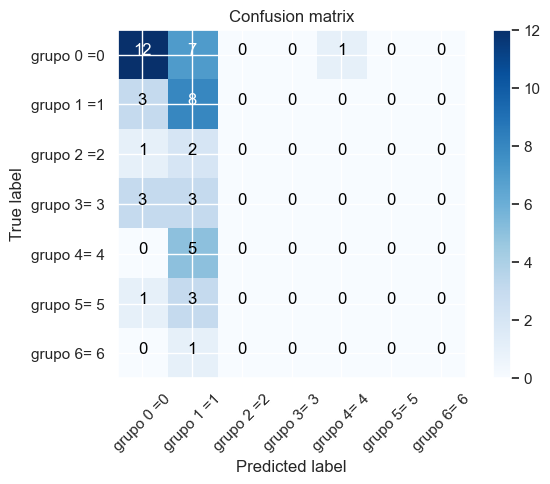

In [26]:
cnf_matrix = confusion_matrix(y_test1, test_pred, labels=[0, 1,  2,  3,  4, 5, 6])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['grupo 0 =0','grupo 1 =1', 'grupo 2 =2', 'grupo 3= 3', 'grupo 4= 4', 'grupo 5= 5', 'grupo 6= 6'],normalize= False,  title='Confusion matrix')

As we expected, the confussion matrix shows an average prediction for group 0 and 1, but really bad for the rest. Now we tried a second time increasing the number of trees.

In [27]:
clf = RandomForestClassifier(n_estimators = 200)
clf.fit(x_train1,y_train1)
test_pred = clf.predict(x_test1)


C:\Temp\ipykernel_11852\4181524904.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train1,y_train1)


              precision    recall  f1-score   support

           0       0.61      0.55      0.58        20
           1       0.26      0.73      0.38        11
           2       1.00      0.00      0.00         3
           3       1.00      0.00      0.00         6
           4       0.00      0.00      0.00         5
           5       1.00      0.00      0.00         4
           6       1.00      0.00      0.00         1

    accuracy                           0.38        50
   macro avg       0.70      0.18      0.14        50
weighted avg       0.58      0.38      0.32        50

Confusion matrix, without normalization
[[11  8  0  0  1  0  0]
 [ 3  8  0  0  0  0  0]
 [ 1  2  0  0  0  0  0]
 [ 2  4  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 1  3  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]]


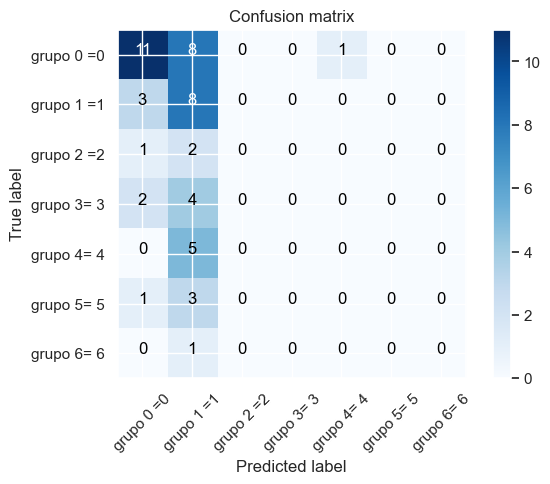

In [28]:
print(classification_report(y_test1, test_pred, zero_division=1))
cnf_matrix = confusion_matrix(y_test1, test_pred, labels=[0, 1,  2,  3,  4, 5, 6])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['grupo 0 =0','grupo 1 =1',
'grupo 2 =2', 'grupo 3= 3', 'grupo 4= 4',
'grupo 5= 5', 'grupo 6= 6'],
normalize= False,  title='Confusion matrix')

As with the last method, it seems the algorithm just predict the most important types, as the bigger numbers are the best predicted ones.

# K MEANS CLASSIFIER

To see if there is any possibility of good classification we decided to created a K-means cluster.


In [29]:
from sklearn.cluster import KMeans 


In [30]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(df.drop(['name','descriptor', 'description', 'Location'],axis=1))
labels= k_means.labels_
df["Clus_km"] = labels

df

,name,rating,reviews,description,descriptor,Location,type,cafe,bar,spa,lodging,restaurant,bakery,store,night_club,book_store,tourist_attraction,florist,liquor_store,movie_rental,electronics_store,home_goods_store,movie_theater,gym,health,parking,gas_station,car_wash,convenience_store,car_repair,art_gallery,park,meal_takeaway,meal_delivery,laundry,Clus_km
0,Mezquita Azul,4.7,82703,Famosa Mezquita Azul con 6 alminares,Mezquita,Fatih,0,20,2,1,1,11,3,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,Gran Bazar,4.4,117603,Laberinto de vistosos mercados cubiertos,Mercado,Fatih,0,20,2,0,0,9,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Bazar de las Especias,4.5,138987,Mercado de especias y productos textiles,Mercado,Fatih,0,20,2,1,1,10,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Mezquita de Suleiman,4.9,43378,Histórica mezquita otomana del siglo XVI,Mezquita,Fatih,1,20,1,0,0,8,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,Hipódromo de Constantinopla,4.7,26368,Plaza con los restos de un hipódromo,Parque,Fatih,3,20,2,1,1,11,3,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Rahmi M. Koç Museum,4.8,20887,Museo de aparatos industriales y coches,Museo,Beyoğlu,5,20,0,0,0,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
96,Museo de Arte Turco e Islámico,4.6,3461,Palacio con arte turco e islámico,Museo,Fatih,1,20,2,1,1,11,3,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
97,Palacio de Topkapi,4.7,78379,Histórico complejo palaciego otomano,Espacio histórico,Fatih,1,20,2,1,1,14,3,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
98,Museo arqueológico de Estambul,4.6,13443,Museo de arqueología de Turquía,Museo,Fatih,0,20,2,1,1,13,3,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


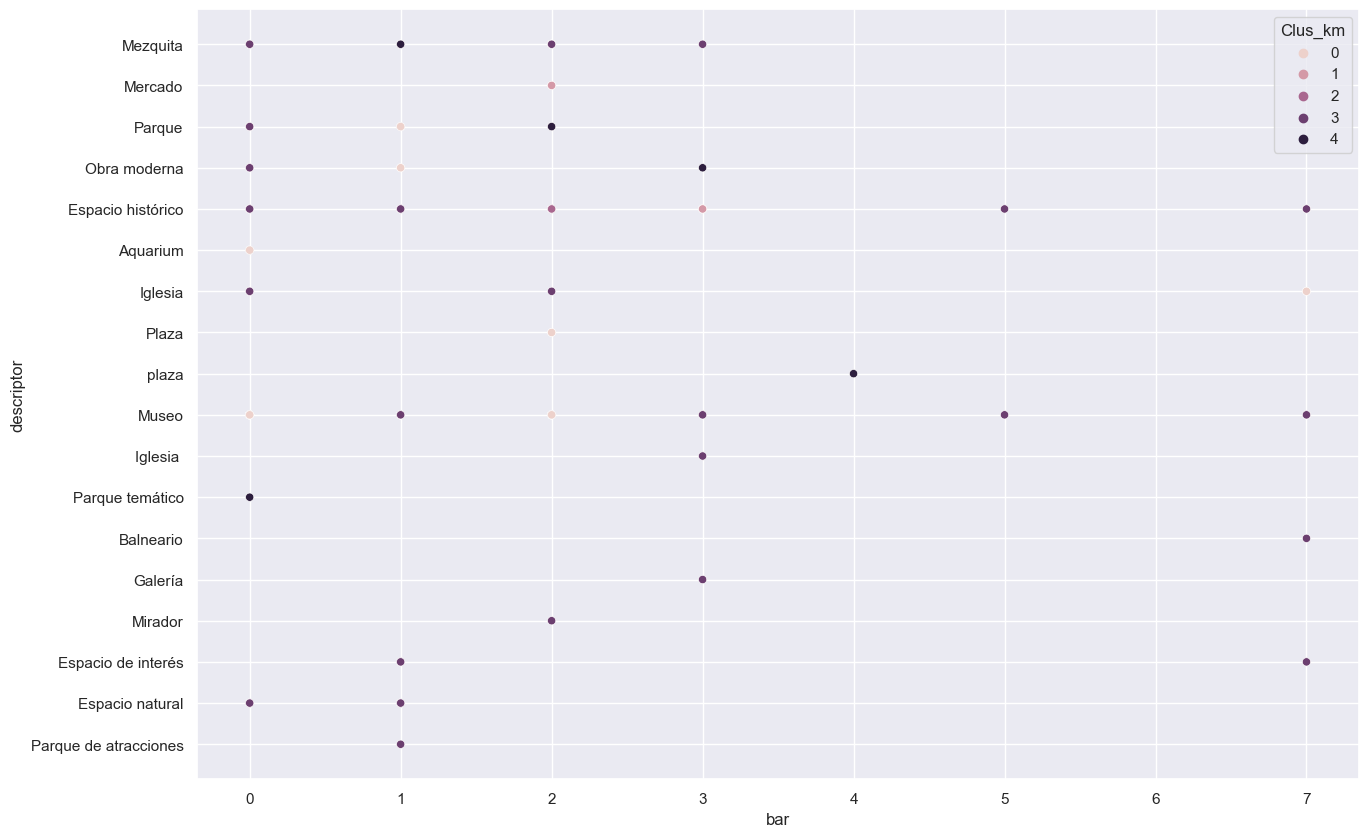

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(data= df, x='bar', y= 'descriptor', hue='Clus_km');

Due to the fact there is a massive amount of variables, after several scatter plots, we were unable to find the concrete relation that created the clusters.
Nevertheless, we performed the test, to see if we can improve and see if there is some kind of costumer segmentation

In [32]:
x2= df.drop(['type', 'Location', 'name', 'description', 'descriptor', 'Location'], axis=1)
y2= df[['Clus_km']]
x_train2, x_test2, y_train2, y_test2= train_test_split( x2, y2, test_size=0.5, random_state=4)

In [33]:
clf = RandomForestClassifier(n_estimators = 50)
clf.fit(x_train2,y_train2)
test_pred = clf.predict(x_test2)
print(classification_report(y_test2, test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       1.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       0.97      1.00      0.98        29
           4       1.00      0.83      0.91         6

    accuracy                           0.94        50
   macro avg       0.96      0.75      0.75        50
weighted avg       0.94      0.94      0.93        50



C:\Temp\ipykernel_11852\1853868340.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train2,y_train2)


The Random forest predicted with great accuracy as well as not overfitting of the model.

Confusion matrix, without normalization
[[11  0  0  1  0]
 [ 1  0  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0 29  0]
 [ 1  0  0  0  5]]


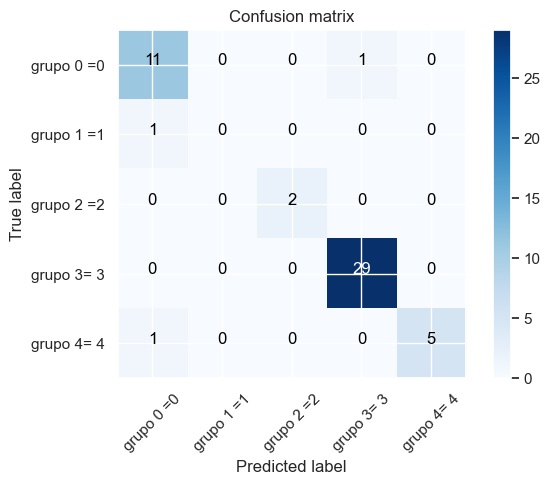

In [34]:
cnf_matrix = confusion_matrix(y_test2, test_pred, labels=[0, 1,  2,  3,  4])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['grupo 0 =0','grupo 1 =1', 'grupo 2 =2', 'grupo 3= 3', 'grupo 4= 4'],normalize= False,  title='Confusion matrix')

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree= DecisionTreeClassifier(criterion= 'entropy', random_state=4, ccp_alpha=0.2)
tree_fit= tree.fit(x_train2,y_train2)
tree_pre=tree.predict(x_test2)
print(classification_report(y_test2, tree_pre, zero_division=1))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       1.00      0.00      0.00         1
           2       1.00      0.00      0.00         2
           3       0.97      1.00      0.98        29
           4       0.75      1.00      0.86         6

    accuracy                           0.92        50
   macro avg       0.93      0.58      0.55        50
weighted avg       0.93      0.92      0.89        50



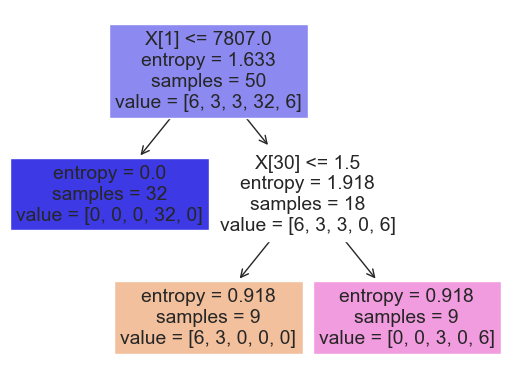

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure()
plot_tree(tree_fit, filled=True, 
          )
plt.show();

# FINDINGS

As we can see, there are several conlussions from this dataframe experiment and the machine learning performs.

We are going to explained point by point:

1. Deep learning: As we do not have access to the google analitics for the type of tourist and costumer for every monument and, also, due to the lack of more data, the model failed to predict different types of costumers. In this case, more data of monuments, as from Ankara, Izmir or Antalya may clarify the classifcation. We found interesting this idea as the more number of rows for the training set, the slightly better performs in accuracy was the model doing.

2. After the failure of the process, we tried to see if the random forest was able to predicted. Again, the lack of more data was the cause to not perform an accurate prediction. Nevertheless, the random forest was a really good choice.

3. The K-means clustering made several clusters that perform a really accurate and not overfitted model. It seems that it took several parameters to create the groups. After checking with a scatter plot several variables, we have not a exact reason to know the accuracy. Thus, with several variables the math projection can be used to stimated costumer classification, again, with more data.

4. Finally, we created a MONGO db data base with all the json files to future neuralnetwork projects related to this list of monuments. Also it can be used to store more data as well as create an interesting database begging for our business.